In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [32]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# MNIST IMAGE --> Tensors

In [6]:
transform = transforms.ToTensor()

In [8]:
train_data = datasets.MNIST(root='../Data',train=True,download=True,transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../Data\MNIST\raw\train-images-idx3-ubyte.gz to ../Data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../Data\MNIST\raw\train-labels-idx1-ubyte.gz to ../Data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../Data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../Data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../Data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../Data\MNIST\raw



C:\Users\burak\anaconda3\envs\pytorchenv\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [9]:
test_data = datasets.MNIST(root='../Data',train=False,download=True,transform=transform)

In [10]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ../Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [12]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [15]:
train_data[0] # first image

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [16]:
type(train_data[0])

tuple

In [17]:
image,label = train_data[0]

In [18]:
image.shape # One is stand for grayscale image

torch.Size([1, 28, 28])

In [20]:
label # number should be 5

5

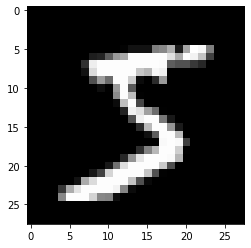

In [39]:
plt.imshow(image.reshape((28,28)),cmap='gray') # we dropped grayscale 

In [40]:
torch.manual_seed(101) # same values can come again for same batching process

train_loader = DataLoader(train_data,batch_size=100,shuffle=True)

test_loader = DataLoader(test_data,batch_size=500, shuffle=False)

In [42]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int = lambda x : f'{x:4}')) # formatting

In [43]:
# First Batch
for images,labels in train_loader:
    # 60,000 / 100 60 times
    break;
# break stands for first batch because we want just first batch
    

In [44]:
images.shape #100 batch size, 1 grayscale ,28 shaping

torch.Size([100, 1, 28, 28])

In [45]:
labels.shape

torch.Size([100])

Labels: [7 2 3 5 8 5 3 6 9 9 1 3]


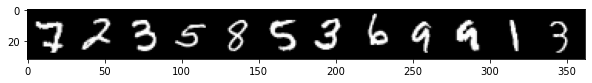

In [48]:
#Print the first 12 labels
print('Labels:',labels[:12].numpy())

#print first 12 images
im = make_grid(images[:12],nrow=12)
plt.figure(figsize=(10,4))

#We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(),(1,2,0))) # With transpose Color width height to width height color is changing their index

## Creating The Network

In [71]:
class MultilayerPerceptron(nn.Module):
    
    def __init__(self,in_sz=784,out_sz=10,layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
        
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X,dim=1) # Multi Class Classification

In [72]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [73]:
# ANN --> CNN

for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [74]:
# 105,214 total parameters

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [76]:
images.shape # ---> [100,784] # combining to single dimension

torch.Size([100, 1, 28, 28])

In [77]:
images.view(100,-1).shape

torch.Size([100, 784])

## Training And Evaluation

In [83]:
import time

start_time = time.time()

#Training

epochs = 10

# Trackers
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]

for i in range(epochs):
        
    trn_corr = 0
    tst_corr = 0
        
    for b,(X_train,y_train) in enumerate(train_loader):
            
            b += 1
            # 10 Neurons
            # [0.1,0.0,....,0,8] --> 9 
            y_pred = model(X_train.view(100,-1))
            loss = criterion(y_pred,y_train)
    
            predicted = torch.max(y_pred.data,1)[1]
            batch_corr = (predicted==y_train).sum()
            trn_corr += batch_corr

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if b%200 == 0:
                acc = trn_corr.item()*100/(100*b)
                print(f'Epoch {i} batch {b} loss : {loss.item()} accuracy : {acc}' )
            

    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        
        for b, (X_test, y_test) in enumerate(test_loader):
            
            y_val = model(X_test.view(500,-1))
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr +=  (predicted == y_test).sum()
            
        loss = criterion(y_val,y_test)
        train_losses.append(loss.item())
        train_correct.append(trn_corr.item())
            

total_time = time.time() - start_time

print(f'Duration : {total_time/60} mins')

Epoch 0 batch 200 loss : 0.0057130311615765095 accuracy : 99.77
Epoch 0 batch 400 loss : 0.019503481686115265 accuracy : 99.6875
Epoch 0 batch 600 loss : 0.01026415266096592 accuracy : 99.65333333333334
Epoch 1 batch 200 loss : 0.001932803075760603 accuracy : 99.73
Epoch 1 batch 400 loss : 0.02213677577674389 accuracy : 99.6925
Epoch 1 batch 600 loss : 0.014130230993032455 accuracy : 99.64166666666667
Epoch 2 batch 200 loss : 0.007299133576452732 accuracy : 99.79
Epoch 2 batch 400 loss : 0.005772988311946392 accuracy : 99.795
Epoch 2 batch 600 loss : 0.02174391597509384 accuracy : 99.715
Epoch 3 batch 200 loss : 0.002968038897961378 accuracy : 99.465
Epoch 3 batch 400 loss : 0.02780657820403576 accuracy : 99.5275
Epoch 3 batch 600 loss : 0.0019879965111613274 accuracy : 99.595
Epoch 4 batch 200 loss : 0.005070785991847515 accuracy : 99.915
Epoch 4 batch 400 loss : 0.0015616256278008223 accuracy : 99.91
Epoch 4 batch 600 loss : 0.0015278946375474334 accuracy : 99.82166666666667
Epoch 5 

## Evulation

In [96]:
from sklearn.metrics import confusion_matrix
# Graph will be added soon

In [97]:
confusion_matrix(predicted.view(-1),y_test.view(-1))

array([[49,  0,  2,  0,  1,  1,  0,  0,  0,  0],
       [ 1, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 52,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 37,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2, 47,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 41]], dtype=int64)